In [90]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [96]:
race_x = pd.read_pickle("race_x.pkl").values
race_y = pd.read_pickle("race_y.pkl").values
len(race_y)

15446

In [97]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(race_x, race_y, train_size=0.7)

In [198]:
def learningModel(dim1, dim2, dim3, batch_size, epochs):
    n_in = 28  # 入力層のニューロン数
    n_mid1 = dim1  # 中間層のニューロン数
    n_mid2 = dim2
    n_mid3 = dim3
    n_out = 8 # 出力層のニューロン数

    # 入力層、中間層、出力層の３層のニューラルネットワークを構築する
    model = Sequential()

    #中間層を追加する。最初に層を追加するときはinput_shapeを設定すること。
    #input_shapeのところには形状を入れるため1
    # 活性化関数にシグモイド関数
    model.add(Dense(n_mid1, input_shape=(n_in,), activation="sigmoid"))
    model.add(Dense(n_mid2, input_shape=(n_mid1,), activation="sigmoid"))
    model.add(Dense(n_mid3, input_shape=(n_mid2,), activation="sigmoid"))

    #出力層を追加する
    model.add(Dense(n_out, activation="linear"))  

    # 損失関数に二乗誤差、最適化アルゴリズムにSGDを使用する
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy'])  

    #学習開始
    history = model.fit( x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=0)
    score = model.evaluate(x_test, y_test, verbose=1)
    print("Test score", score[0])
    print("Test accuracy", score[1])
    return history, score

In [199]:
history, score = learningModel(20, 17, 19, 43, 150)

145/145 [==============================] - 0s 735us/step - loss: 0.1018 - accuracy: 0.2693
Test score 0.10175443440675735
Test accuracy 0.269313782453537


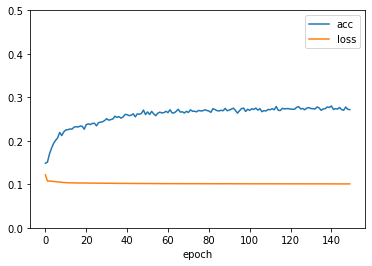

In [200]:
plt.plot(history.epoch, history.history["accuracy"], label="acc")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.xlabel("epoch")
plt.ylim(0.00, 0.50)
plt.legend()

In [107]:
print(type(x_train[0]))
targets = x_train[0].tolist()
prediction = model.predict([targets]).flatten()

<class 'numpy.ndarray'>


In [108]:
print(prediction)
print(targets)

[0.01374435 0.131319   0.12385494 0.14129187 0.14866775 0.15439036
 0.15613803 0.13270487]
[7.0, 2.0, 3.0, 6.0, 3.92, 87.75, 7.0, 3.0, 1.0, 10.0, 33.0, 92.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
